In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lee el archivo CSV en un DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataframe_completo.csv')

# Obtiene un listado de todas las columnas
columnas = data.columns

# Imprime las columnas
print("Listado de todas las columnas:")
for columna in columnas:
    print(columna)


Listado de todas las columnas:
Year
Quarter
Provincia
Partido
Localidad
Poblacion_2022
Acc_cada_100_hog
Acc_cada_100_hab
ADSL_2022
Cablemodem_2022
Dial Up_2022
Fibra optica_2022
Satelital_2022
Wireless_2022
Telefonia Fija_2022
3G_2022
4G_2022
Cant_ADSL_2022
Cant_Cablemodem_2022
Cant_DialUp_2022
Cant_FibraOptica_2022
Cant_Otros_2022
Cant_Satelital_2022
Cant_Wimax_2022
Cant_Wireless_2022
Total_2022
Pob_prov_2022
Salario_promedio
Latitud
Longitud


<ipython-input-4-59f1d460094b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = data.corr()


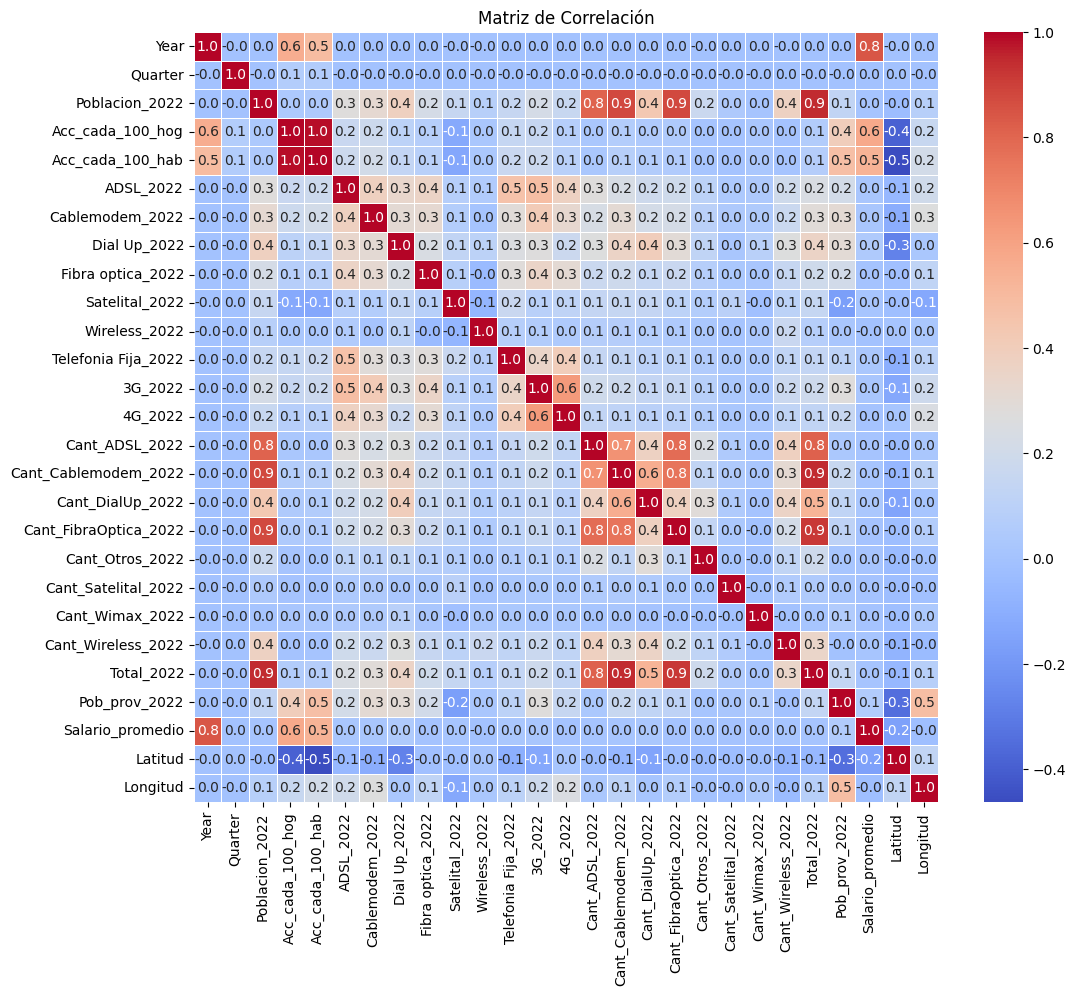

In [ ]:
# Calcula la matriz de correlación
matriz_correlacion = data.corr()

# Aumenta el tamaño de la figura y rota las etiquetas de los ejes
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f", xticklabels=True, yticklabels=True)
plt.title('Matriz de Correlación')  # Título del gráfico
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.yticks(rotation=0)   # Rota las etiquetas del eje y si es necesario
plt.show()

In [ ]:
# Divide tus datos en características (X) y variable objetivo (y)
X = data[['Poblacion_2022']]  # Reemplaza con tus nombres de características
y = data['Total_2022']  # Reemplaza con el nombre de tu variable objetivo

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crea una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

In [ ]:
# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 26186871.425666813
Coeficiente de determinación (R^2): 0.8806977849094711


In [ ]:
# Puedes acceder a los coeficientes del modelo y al intercepto de la siguiente manera:
coeficientes = modelo_regresion.coef_
intercepto = modelo_regresion.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Coeficientes: [0.33638858]
Intercepto: -621.9363530468413


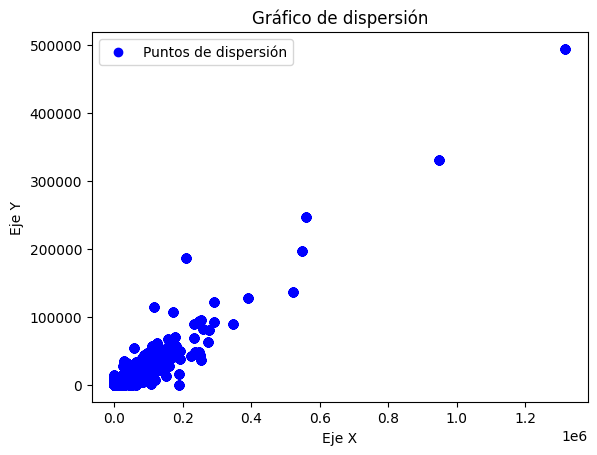

In [ ]:
# Datos
x = data[['Poblacion_2022']] # Valores para el eje X
y = data['Total_2022'] # Valores para el eje Y

# Crear el gráfico de dispersión
plt.scatter(x, y, label='Puntos de dispersión', color='blue', marker='o')

# Agregar etiquetas de ejes y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión')

# Mostrar una leyenda si es necesario
plt.legend()

# Mostrar el gráfico
plt.show()


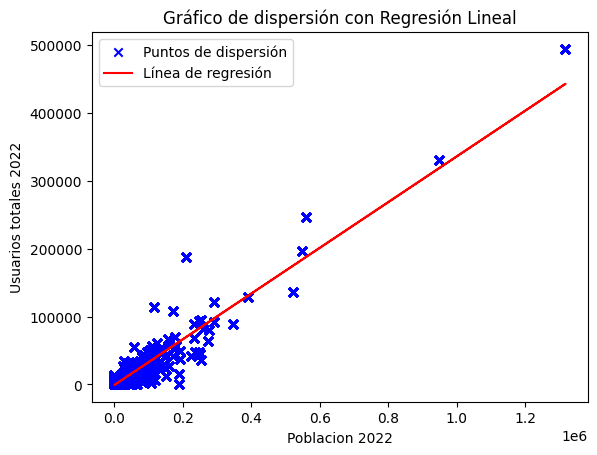

In [ ]:
# Datos
x = data[['Poblacion_2022']]  # Valores para el eje X
y = data['Total_2022']        # Valores para el eje Y

# Coeficientes y el intercepto obtenidos del análisis de regresión
coeficientes = [0.33638858]    # Reemplaza con tus coeficientes
intercepto = -621.9363530468413  # Reemplaza con tu intercepto

# Calcular los valores predichos usando la regresión lineal
y_pred = coeficientes[0] * x + intercepto

# Crear el gráfico de dispersión
plt.scatter(x, y, label='Puntos de dispersión', color='blue', marker='x')

# Agregar el valor de R² al título
plt.title(f'Gráfico de dispersión con Regresión Lineal (R² = {r2:.2f})')

# Agregar la línea de regresión
plt.plot(x, y_pred, label='Línea de regresión', color='red')

# Agregar etiquetas de ejes y título
plt.xlabel('Poblacion 2022')
plt.ylabel('Usuarios totales 2022')
plt.title('Gráfico de dispersión con Regresión Lineal')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


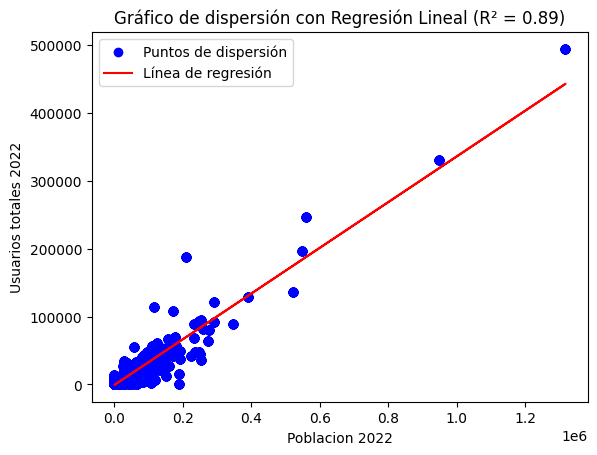

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Datos
x = data[['Poblacion_2022']]  # Valores para el eje X
y = data['Total_2022']        # Valores para el eje Y

# Coeficientes y el intercepto obtenidos del análisis de regresión
coeficientes = [0.33638858]    # Reemplaza con tus coeficientes
intercepto = -621.9363530468413  # Reemplaza con tu intercepto

# Calcular los valores predichos usando la regresión lineal
y_pred = coeficientes[0] * x + intercepto

# Calcular el coeficiente de determinación (R²)
slope, intercept, r_value, p_value, std_err = stats.linregress(x.values.flatten(), y)
r_squared = r_value ** 2

# Crear el gráfico de dispersión
plt.scatter(x, y, label='Puntos de dispersión', color='blue', marker='o')

# Agregar la línea de regresión
plt.plot(x, y_pred, label='Línea de regresión', color='red')

# Agregar el valor de R² al título
plt.title(f'Gráfico de dispersión con Regresión Lineal (R² = {r_squared:.2f})')

# Agregar etiquetas de ejes
plt.xlabel('Poblacion 2022')
plt.ylabel('Usuarios totales 2022')

# Mostrar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
